In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, random

sys.path.append("/Users/pickle/Documents/GitHub/Diablo_2")
from beam import beam
import madx_utils.madx_utils as mxu
import optics_utils.transfer_matrices as opu

In [33]:
random.random()

0.6052329548311686

In [2]:
lattice_file = "lattice_example/optics_71.7_MeV.twiss"
df_optics = mxu.get_twiss(lattice_file)
df_optics[:10];

In [2]:
bm = beam.Beam()
bm.read_distribution("distribution_example/CCL_Output_71.7.dat")

beam created without any input beam distribution. Use read_distribution(filename)


'The beam distribution has been loaded successfully , You should check the distribution is correctly formatted into the dataframe - type thenameofyourobject.distribution'

In [13]:
from scipy import stats

In [35]:
df = bm.distribution[["X(mm)", "XP(mrad)"]]

mean = np.mean(df["X(mm)"])

standard_deviation = np.std(df["X(mm)"])

xrange = np.arange(min(df["X(mm)"]), max(df["X(mm)"]), 0.01)
beam_distribution = stats.norm.pdf(xrange,loc=mean, scale=standard_deviation)
beam_distribution;
np.std(df["X(mm)"]), np.mean(df["X(mm)"])

(0.15201860705198553, 0.000605964336954293)

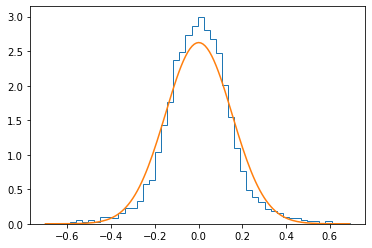

In [30]:
plt.hist(df["X(mm)"], bins=50, density = True, histtype = "step");
plt.plot(xrange, beam_distribution)

In [43]:
len(df["X(mm)"])
random.random()

0.05095204985105839

In [56]:
size_distr = len(df["X(mm)"])
x_fsm = np.arange(-16, 16, 0.125)
simu_pdf = stats.norm.pdf(x_fsm,loc=0.01, scale=0.16)
size_fsm_simu = len(simu_pdf)
noise = [random.random()/4 for i in range(size_fsm_simu)]
fsm_signal = simu_pdf + noise

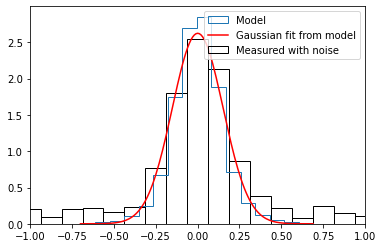

In [78]:
plt.hist(df["X(mm)"], bins=16, density = True, histtype = "step", label = "Model");
plt.plot(xrange, beam_distribution, "r", label = "Gaussian fit from model")
#plt.plot(x_fsm, simu_pdf, "o")
plt.bar(x_fsm, fsm_signal, width = 0.125, fill = False, label = "Measured with noise")
plt.xlim(-1,1)
plt.legend()

In [99]:
fsm = pd.read_csv("BD/FSM/beam-profile-fsm_export-profiles_EMQ1_60A_EMQ2_30A.csv", skiprows=23)
fsm;

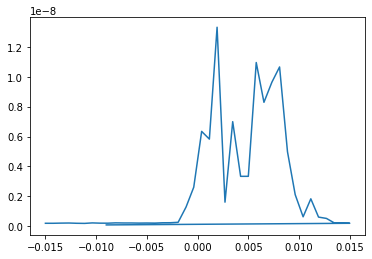

In [105]:
plt.plot(fsm["Fibre Position [m]"], fsm["Long Window Mean of Mean [A]"]);